# Midterm 2 Avetisyan Hayk A09160415

### Problem I. Binary Classification Problem – Logistic Regression 

In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, datasets
import seaborn as sns
import pandas as pd

from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall,  precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets  import make_blobs
from sklearn.neighbors import KNeighborsClassifier


In [2]:
X1, y1 = make_classification(n_samples = 4000, n_features = 15,  n_informative = 2, n_clusters_per_class = 1,
                            random_state = 15, class_sep = 1, flip_y = 0.1, n_classes = 2)
data1 = pd.DataFrame(data = np.c_[X1, y1])
y1=y1.astype(np.int)
data1[15] = pd.to_numeric(data1[15], downcast = "signed")
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.403388,0.770938,1.001764,-0.691294,-1.339403,0.065412,0.951975,-0.013625,-1.975961,0.530070,0.958621,0.110234,-0.046594,-1.218809,1.164586,1
1,-0.127680,0.866926,1.581692,1.086904,0.854383,0.276115,1.946069,-0.262850,-0.062698,-0.962570,1.299814,-0.592851,1.688594,-1.394599,1.288695,1
2,0.040837,0.065395,0.079727,1.476039,-0.097623,-0.541734,1.239089,0.157226,-0.966611,-0.530426,1.002346,1.643465,-1.175809,-1.773509,1.833407,0
3,0.005705,-0.991827,0.713344,-0.586975,0.407284,-0.067042,-2.261362,0.243802,-0.099255,0.200218,0.952317,-0.577024,-1.438821,-1.216177,1.190905,1
4,1.047542,-0.328014,-1.228371,-0.880313,-0.257536,-0.657533,-0.349101,-1.472486,-0.561274,-0.978964,-0.906567,-1.237957,-1.936029,-0.275132,0.409402,0


In [3]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 15)

In [4]:
c_param_list1 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

score_results1 = []

for val in c_param_list1:
    log_reg = LogisticRegression(penalty = 'l2', C = val, solver = 'lbfgs', random_state = 15 )
    kfold = KFold(n_splits=10)
    score = cross_val_score(log_reg, X1_train, y1_train, cv = kfold, scoring = "accuracy")
    score_results1.append(score)
    print("C val: %s, CV Score Avg: %s " % (val, np.mean(score)))

C val: 0.0001, CV Score Avg: 0.8834375 
C val: 0.001, CV Score Avg: 0.89125 
C val: 0.01, CV Score Avg: 0.8949999999999999 
C val: 0.1, CV Score Avg: 0.8934374999999999 
C val: 1, CV Score Avg: 0.8931250000000001 
C val: 10, CV Score Avg: 0.8928125 
C val: 100, CV Score Avg: 0.8928125 
C val: 1000, CV Score Avg: 0.8928125 


In [5]:
avg_cv_scores1 = np.mean(np.array(score_results1), axis = 1)
max_avg_accuracy_index1 = np.argmax(avg_cv_scores1)
print("Optimal Value of C: %s" % c_param_list1[max_avg_accuracy_index1])

Optimal Value of C: 0.01


So, the optimal value of c is 00.1 and the corresponding accuracy is 0.8949999999999999

In [6]:
clf_logistic_optimal1 = LogisticRegression(penalty = 'l2', C = 0.01, solver = 'lbfgs', random_state = 15)
clf_logistic_optimal1.fit(X1_train,y1_train)
clf_logistic_optimal1.score(X1_train,y1_train)

0.8971875

In [7]:
y1_pred_logistic = clf_logistic_optimal1.predict(X1_test)
print(classification_report(y1_test, y1_pred_logistic))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       417
           1       0.90      0.84      0.87       383

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



Both for train and test data the accuracy, precision and recall for both classes are pretty high, which
indicates that the model works well. Moreover, the numers for train data are slightly graeter than in test (which is natural).
From this we can conclude that the model works pretty well.

In [8]:
y1_train_logistic = clf_logistic_optimal1.predict(X1_train)
print(classification_report(y1_train, y1_train_logistic))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1601
           1       0.91      0.88      0.90      1599

    accuracy                           0.90      3200
   macro avg       0.90      0.90      0.90      3200
weighted avg       0.90      0.90      0.90      3200



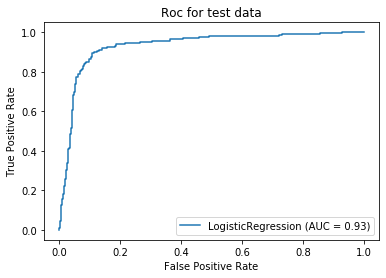

In [9]:
plot_roc_curve(clf_logistic_optimal1, X1_test, y1_test)
plt.title("Roc for test data")
plt.show()

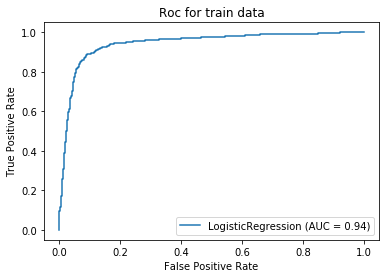

In [10]:
plot_roc_curve(clf_logistic_optimal1, X1_train, y1_train)
plt.title("Roc for train data")
plt.show()

From classification report it was obvious that AUCs for ROC curves would differ insignificantly. The AUC for test data is 0.93
and AUC for train data is 0.94. 

### Problem II. Multiclass Classification Problem - LDA, QDA

In [11]:
X2, y2 = make_blobs(n_samples=[5000,300,150], n_features=10, random_state=15, cluster_std=[6,3,15])
data2 = pd.DataFrame(data = np.c_[X2, y2])
y2=y2.astype(np.int)
data2[10] = pd.to_numeric(data2[10], downcast = "signed")
data2.head()

,0,1,2,3,4,5,6,7,8,9,10
0,3.937964,-2.541304,-6.241349,-0.347584,-10.195986,7.707030,-1.339290,-5.075238,-10.497548,-5.715647,0
1,-5.439797,2.839859,-2.528016,-5.439000,-2.155946,3.401440,-0.191390,-1.902933,1.638488,-1.202153,0
2,10.539282,-13.317182,-3.211972,-9.293222,-6.543871,-6.324584,-8.515325,0.307330,-6.864709,-10.501948,0
3,16.599197,-8.142769,-2.877682,2.792619,-10.164574,0.495828,0.702106,-4.296840,-8.916652,-3.290059,0
4,10.897647,-6.280733,-6.293735,0.161894,3.077441,-4.321087,-7.770812,12.254278,-9.071879,-7.768994,0


In [12]:
clf_LDA2 = LinearDiscriminantAnalysis()
clf_LDA2.fit(X2,y2)
clf_LDA2.score(X2,y2)

0.9781651376146789

In [13]:
clf_QDA2 = QuadraticDiscriminantAnalysis()
clf_QDA2.fit(X2,y2)
clf_QDA2.score(X2,y2)

0.996697247706422

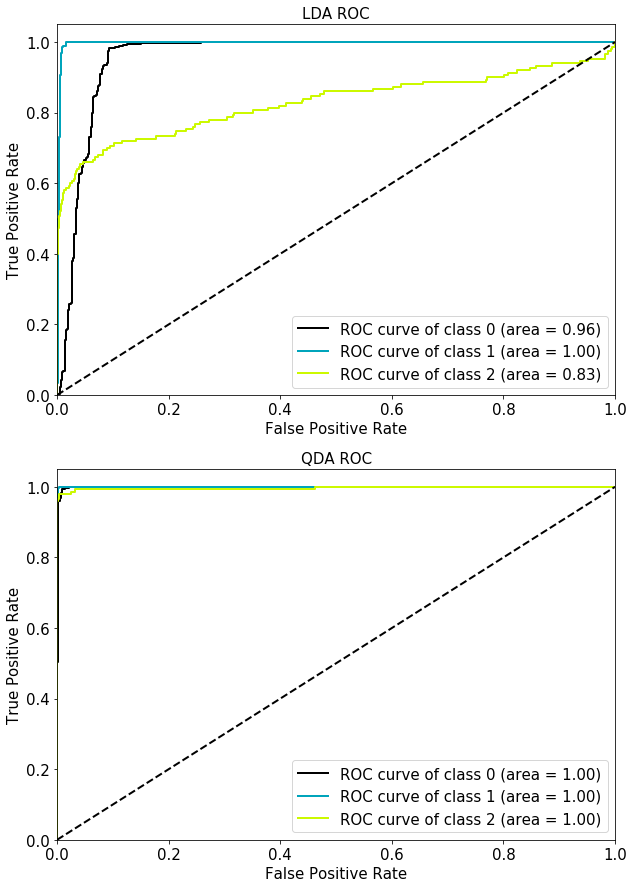

In [14]:
y_probs_lda = clf_LDA2.predict_proba(X2)
y_probs_qda = clf_QDA2.predict_proba(X2)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 15))

ax1 = plot_roc(y2, y_probs_lda, figsize = (8, 7), title_fontsize = 15,
         text_fontsize = 15, plot_micro = False, plot_macro = False, ax = ax1, title = "LDA ROC")

ax2 = plot_roc(y2, y_probs_qda, figsize = (8, 7), title_fontsize = 15,
         text_fontsize = 15, plot_micro = False, plot_macro = False, ax = ax2, title = "QDA ROC")
plt.show()

There is a huge class imbalance as numer of 0s for y2 is very high. It results that it predicts 0 and 1 well, however it predicts 2s pretty 
   bad

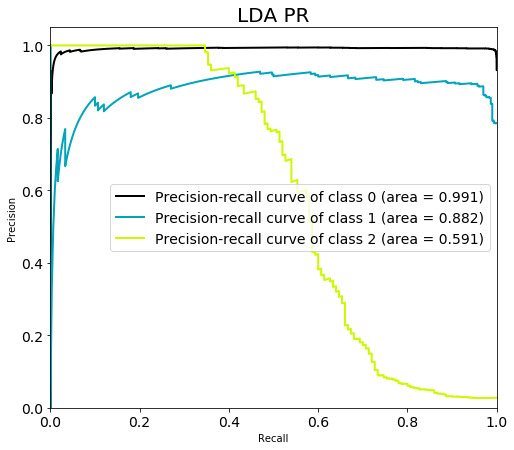

In [15]:
plot_precision_recall(y2, y_probs_lda, figsize = (8, 7), title_fontsize = 20, text_fontsize = 14, plot_micro = False, title = "LDA PR")
plt.show()

The problem is more obvious in these graphs. 

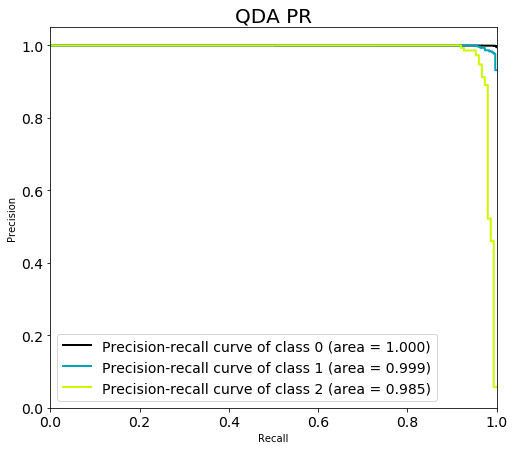

In [16]:
plot_precision_recall(y2, y_probs_qda, figsize = (8, 7), title_fontsize = 20, text_fontsize = 14, plot_micro = False, title = "QDA PR")
plt.show()

# Problem III. Binary Classification - kNN 

In [17]:
k_value_list = np.arange(1,26)
score_results_knn = []

for val in k_value_list:
    knn = KNeighborsClassifier(n_neighbors=val)
    kfold = KFold(n_splits=10)
    score = cross_val_score(knn, X1_train, y1_train, cv = kfold, scoring = "accuracy")
    score_results_knn.append(score)
    print("k val: %s, CV Score Avg: %s " % (val, np.mean(score)))

k val: 1, CV Score Avg: 0.8271875 
k val: 2, CV Score Avg: 0.811875 
k val: 3, CV Score Avg: 0.8590625 
k val: 4, CV Score Avg: 0.8625 
k val: 5, CV Score Avg: 0.8765625 
k val: 6, CV Score Avg: 0.8793749999999999 
k val: 7, CV Score Avg: 0.881875 
k val: 8, CV Score Avg: 0.883125 
k val: 9, CV Score Avg: 0.883125 
k val: 10, CV Score Avg: 0.8868749999999999 
k val: 11, CV Score Avg: 0.8875 
k val: 12, CV Score Avg: 0.8868750000000001 
k val: 13, CV Score Avg: 0.8871875000000001 
k val: 14, CV Score Avg: 0.8862499999999999 
k val: 15, CV Score Avg: 0.8881249999999999 
k val: 16, CV Score Avg: 0.8890625 
k val: 17, CV Score Avg: 0.890625 
k val: 18, CV Score Avg: 0.8918750000000001 
k val: 19, CV Score Avg: 0.8890625 
k val: 20, CV Score Avg: 0.8909375 
k val: 21, CV Score Avg: 0.8940624999999999 
k val: 22, CV Score Avg: 0.8940625000000001 
k val: 23, CV Score Avg: 0.8953125 
k val: 24, CV Score Avg: 0.89375 
k val: 25, CV Score Avg: 0.8959375000000002 


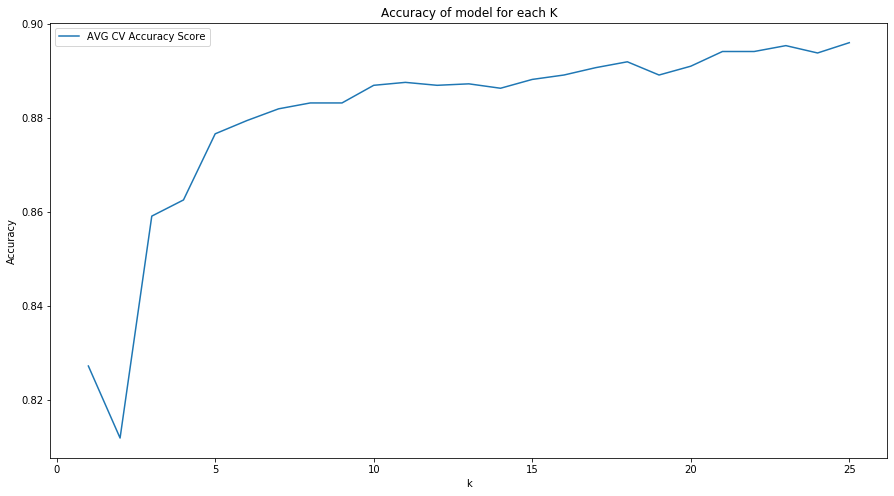

In [18]:
plt.figure(figsize = (15,8)) 
plt.plot(k_value_list, np.mean(np.array(score_results_knn), axis = 1), label = "AVG CV Accuracy Score")
plt.title("Accuracy of model for each K")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
avg_cv_scores_knn = np.mean(np.array(score_results_knn), axis = 1)
max_avg_accuracy_index_knn = np.argmax(avg_cv_scores_knn) 
print("Optimal Value of k: %s" % k_value_list[max_avg_accuracy_index_knn]) 

Optimal Value of k: 25


In [20]:
clf_knn_optimal = KNeighborsClassifier(n_neighbors=24)
clf_knn_optimal.fit(X1_train,y1_train)
clf_knn_optimal.score(X1_train,y1_train)

0.9059375

In [21]:
y_pred_knn_train = clf_knn_optimal.predict(X1_train)
print(classification_report(y1_train, y_pred_knn_train, digits = 5))

              precision    recall  f1-score   support

           0    0.89016   0.92630   0.90787      1601
           1    0.92308   0.88555   0.90393      1599

    accuracy                        0.90594      3200
   macro avg    0.90662   0.90592   0.90590      3200
weighted avg    0.90661   0.90594   0.90590      3200



From report on test and train data we can see that difference between train and test data report is pretty small, which shows us
that model works pretty good.
Also the accuracy score is higher (0.90312 compared to 0.87625) which is again natural    

In [22]:
y_pred_knn = clf_knn_optimal.predict(X1_test)
print(classification_report(y1_test, y_pred_knn, digits = 5))

              precision    recall  f1-score   support

           0    0.86136   0.90887   0.88448       417
           1    0.89444   0.84073   0.86676       383

    accuracy                        0.87625       800
   macro avg    0.87790   0.87480   0.87562       800
weighted avg    0.87720   0.87625   0.87600       800



From report on test data for both logistic (above) and knn models (below) we can conclude that logistic model works slightly better as for both classes the precison and recall are higher in case of logistic regression which indicates that 
this model can predict each class better. However, only completnes of 0 class in case of knn works very insignifcantly bette.

In [23]:
y1_pred_logistic = clf_logistic_optimal1.predict(X1_test)
print(classification_report(y1_test, y1_pred_logistic))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       417
           1       0.90      0.84      0.87       383

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



##### ROC curves for each class of logistic regresion model and knn model

In [24]:
pred_prob_knn = clf_knn_optimal.predict_proba(X1_test)
pred_prob_lr = clf_logistic_optimal1.predict_proba(X1_test)

In [25]:
fpr0_knn, tpr0_knn, thresholds0_knn = roc_curve(y1_test, pred_prob_knn[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_knn, tpr0_knn))

fpr1_knn, tpr1_knn, thresholds1_knn = roc_curve(y1_test, pred_prob_knn[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_knn, tpr1_knn))


fpr0_lr, tpr0_lr, thresholds0_lr = roc_curve(y1_test, pred_prob_lr[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_lr, tpr0_lr))

fpr1_lr, tpr1_lr, thresholds1_lr = roc_curve(y1_test, pred_prob_lr[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_lr, tpr1_lr))

ROC: AUC Class 0:  0.925671995041043
ROC: AUC Class 1:  0.9256719950410428
ROC: AUC Class 0:  0.9308876658464351
ROC: AUC Class 1:  0.9308876658464351


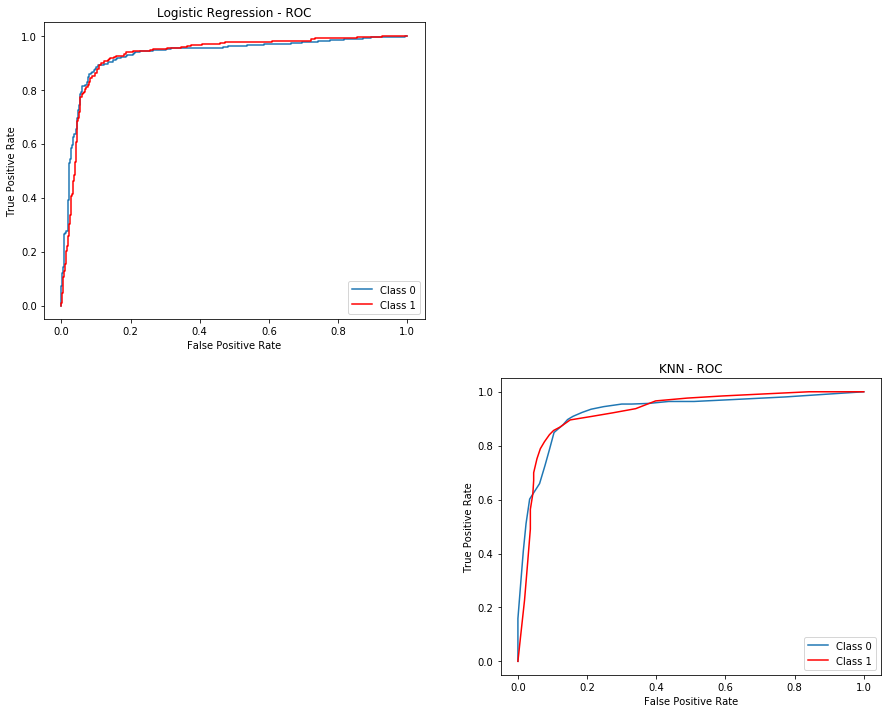

In [26]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
plt.plot(fpr0_lr, tpr0_lr, "-", label = "Class 0")
plt.plot(fpr1_lr, tpr1_lr, "-", color = 'r', label = "Class 1")
plt.title("Logistic Regression - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()


plt.subplot(2,2,4)
plt.plot(fpr0_knn, tpr0_knn, "-", label = "Class 0")
plt.plot(fpr1_knn, tpr1_knn, "-", color = 'r', label = "Class 1")
plt.title("KNN - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.show()

For both classes AUC of logistic regression is higher slightly which indicates that logistic model works better.

In [27]:
p0_lr, r0_lr, thresholds0_lr = precision_recall_curve(y1_test, pred_prob_lr[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 0:", auc(r0_lr, p0_lr))

p1_lr, r1_lr, thresholds1_lr = precision_recall_curve(y1_test, pred_prob_lr[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_lr, p1_lr))

p0_knn, r0_knn, thresholds0_knn = precision_recall_curve(y1_test, pred_prob_knn[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 0:", auc(r0_knn, p0_knn))

p1_knn, r1_knn, thresholds1_knn = precision_recall_curve(y1_test, pred_prob_knn[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_knn, p1_knn))

Precision-Recall: AUC Class 0: 0.9323606969185714
Precision-Recall: AUC Class 1: 0.9023524088808552
Precision-Recall: AUC Class 0: 0.9331652027721788
Precision-Recall: AUC Class 1: 0.8999226563192987


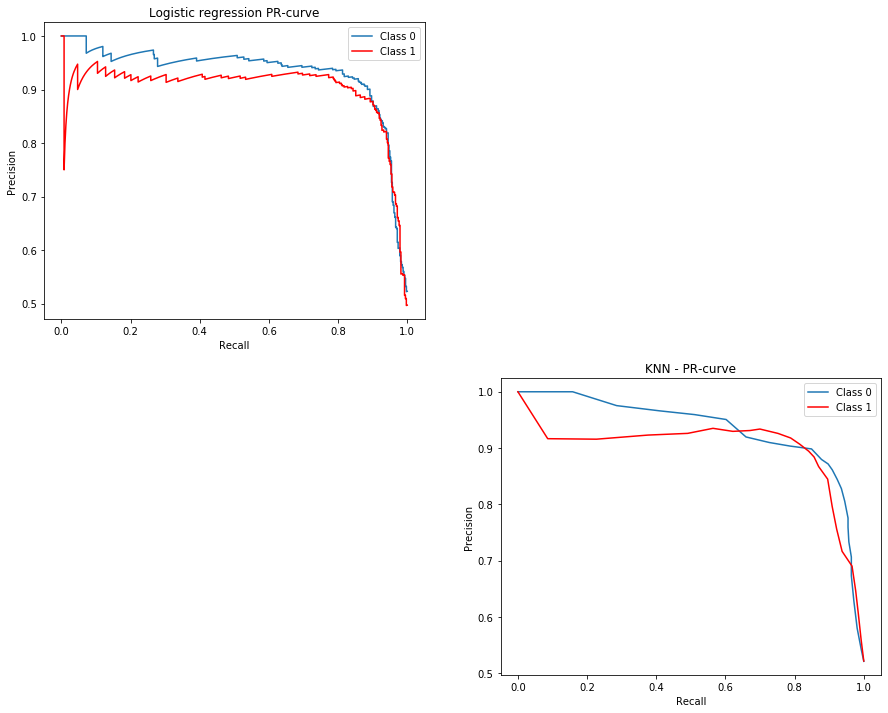

In [28]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
plt.plot(r0_lr, p0_lr, "-", label = "Class 0")
plt.plot(r1_lr, p1_lr, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Logistic regression PR-curve")


plt.subplot(2,2,4)
plt.plot(r0_knn, p0_knn, "-", label = "Class 0")
plt.plot(r1_knn, p1_knn, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("KNN - PR-curve")

plt.show()

The same we can say for AUCPr s. For logistic model AUCPr is higher for both classes.